## Host

In [1]:
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt

In [ ]:
zip_path = '../data/cleaned/data_cleaned.zip'
folder_extract = '../data/temp_extracted'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(folder_extract)

In [3]:
df_train = pd.read_csv('../data/temp_extracted/train.csv')
df_test = pd.read_csv('../data/temp_extracted/test.csv')

In [4]:
df_train

,index,host,timestamp,request,response,bytes
0,0,199.72.81.55,1995-07-01 00:00:01,GET /history/apollo/ HTTP/1.0,200,6245
1,1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985
2,2,199.120.110.21,1995-07-01 00:00:09,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,3,burger.letters.com,1995-07-01 00:00:11,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,4,199.120.110.21,1995-07-01 00:00:11,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179
...,...,...,...,...,...,...
2934925,2934925,sfsp129.slip.net,1995-08-22 23:59:55,GET /images/ksclogo-medium.gif HTTP/1.0,200,5866
2934926,2934926,sfsp129.slip.net,1995-08-22 23:59:57,GET /images/NASA-logosmall.gif HTTP/1.0,200,786
2934927,2934927,sfsp129.slip.net,1995-08-22 23:59:57,GET /images/MOSAIC-logosmall.gif HTTP/1.0,200,363
2934928,2934928,sfsp129.slip.net,1995-08-22 23:59:58,GET /images/USA-logosmall.gif HTTP/1.0,200,234


In [5]:
class VisitorAnalyzer:
    def __init__(self):
        self.switcher = {
            'net': 'network',
            'com': 'commercial',
            'org': 'organisation',
            'edu': 'education',
            'gov': 'government',
            'int': 'international',
            'mil': 'military'
        }

    def get_visitor_domain(self, url):
        """Trích xuất domain từ host/url"""
        try:
            if not isinstance(url, str): return "None"
            domain_index = url.rindex('.')
            domain = url[domain_index + 1:]
            if domain.isdigit():
                return "None"
            return domain
        except:
            return "None"

    def categorise_visitor(self, domain):
        """Phân loại domain thành country hoặc loại hình tổ chức"""
        if not domain or domain == "None":
            return 'unknown'
        
        domain_length = len(domain)
        if domain_length == 2:
            return 'country'
        elif domain_length == 3:
            return self.switcher.get(domain, 'unknown')
        else:
            return 'unknown'

    def process_dataframe(self, df, host_column='host'):
        """Hàm tổng hợp để xử lý toàn bộ dataframe"""
        temp_df = df[['index', host_column]].copy()
        
        # Áp dụng hàm trích xuất
        temp_df['domain'] = temp_df[host_column].apply(self.get_visitor_domain)
        temp_df['category'] = temp_df['domain'].apply(self.categorise_visitor)
        
        return temp_df

    def plot_categories(self, df, title="Types of Visitors"):
        """Hàm vẽ biểu đồ phân loại"""
        stats = df.groupby('category')['category'].count().sort_values(ascending=False).reset_index(name='count')
        
        fig, ax = plt.subplots(figsize=(12, 6))
        bars = ax.barh(stats['category'], stats['count'], color='skyblue')
        ax.invert_yaxis()
        
        # Thêm số liệu trên bar
        for i in bars:
            plt.text(i.get_width() + 0.2, i.get_y() + 0.5, 
                     f"{int(i.get_width())}", va='center', fontweight='bold', color='grey')
        
        ax.set_title(title)
        plt.tight_layout()
        plt.show()

In [28]:
def create_visitor(df, name, analyzer):
    print(f"Processing {name} data...")
    df_visitors = analyzer.process_dataframe(df)
    analyzer.plot_categories(df_visitors, title=f"Visitor Types - {name} Set")
    return df_visitors

Processing Train data...


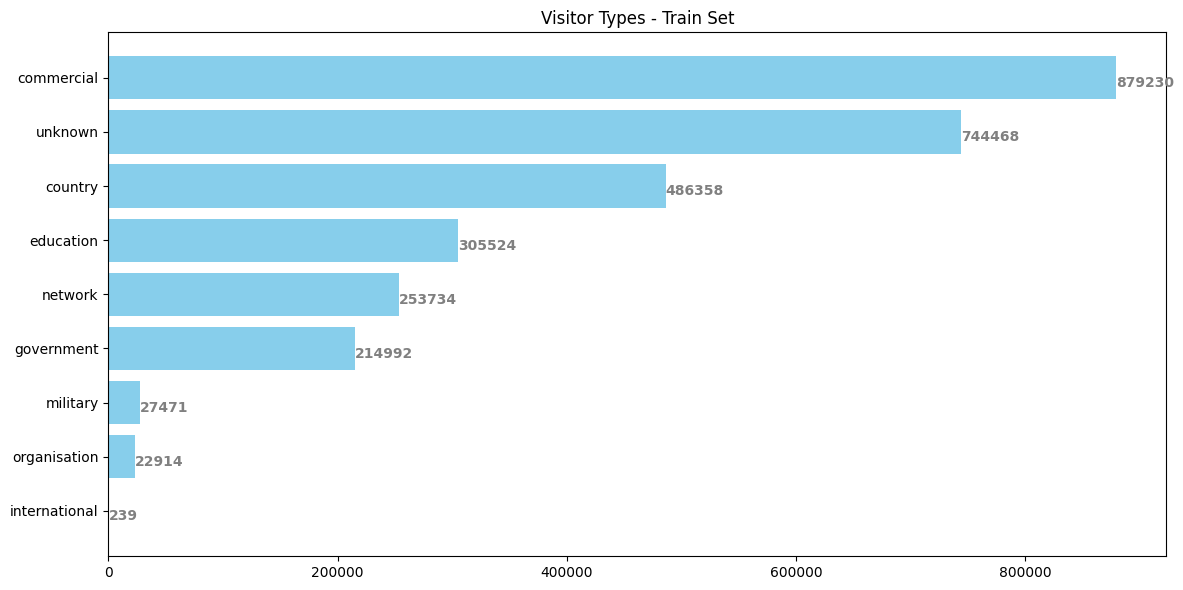

Processing Test data...


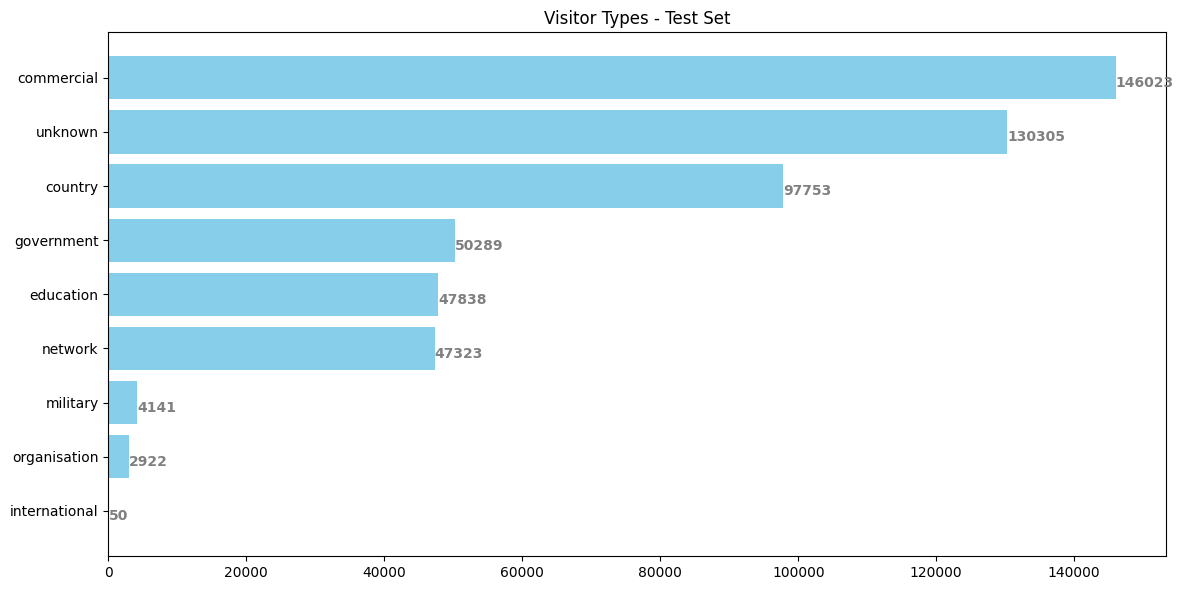

In [45]:
my_analyzer = VisitorAnalyzer()
df_train_visitors = create_visitor(df_train, "Train", my_analyzer)
df_test_visitors = create_visitor(df_test, "Test", my_analyzer)

In [46]:
df_train_visitors

,index,host,domain,category
0,0,199.72.81.55,None,unknown
1,1,unicomp6.unicomp.net,net,network
2,2,199.120.110.21,None,unknown
3,3,burger.letters.com,com,commercial
4,4,199.120.110.21,None,unknown
...,...,...,...,...
2934925,2934925,sfsp129.slip.net,net,network
2934926,2934926,sfsp129.slip.net,net,network
2934927,2934927,sfsp129.slip.net,net,network
2934928,2934928,sfsp129.slip.net,net,network


In [47]:
df_test_visitors

,index,host,domain,category
0,0,ix-mia1-02.ix.netcom.com,com,commercial
1,1,internet-gw.watson.ibm.com,com,commercial
2,2,ix-mia1-02.ix.netcom.com,com,commercial
3,3,internet-gw.watson.ibm.com,com,commercial
4,4,internet-gw.watson.ibm.com,com,commercial
...,...,...,...,...
526639,526639,gatekeeper.uccu.com,com,commercial
526640,526640,gatekeeper.uccu.com,com,commercial
526641,526641,cys-cap-9.wyoming.com,com,commercial
526642,526642,www-c8.proxy.aol.com,com,commercial


In [48]:
print('unique domains: ', df_train_visitors['domain'].unique())
df_train_visitors.nunique(axis=0)

unique domains:  ['None' 'net' 'com' 'jp' 'au' 'edu' 'ca' 'org' 'gov' 'us' 'nz' 'uk' 'kr'
 'ch' 'br' 'sg' 'it' 'mil' 'mx' 'nl' 'be' 'za' 'fr' 'de' 'my' 'tw' 'at'
 'fi' 'se' 'id' 'il' 'es' 'no' 'int' 'su' 'ph' 'ie' 'th' 'gr' 'pt' 'dk'
 'kw' 'ru' 'cl' 'cz' 'lv' 'arpa' 'lu' 'cr' 'co' 'tr' 'hr' 'bm' 'ua' 've'
 'si' 'cn' 'ro' 'pl' 'hk' 'sk' 'is' 'ec' 'hu' 'gb' 'sa' 'li' 'ar' 'pa'
 'pr' 'jm' 'in' 'ee' 'do' 'pe' 'fj' 'uy' 'xom' 'go' 'eg' 'ge' 'microd'
 'mt' 'keri' 'rom' 'hps' 'gl' 'gu' 'cy' 'eecs']


index       2934930
host         121245
domain           90
category          9
dtype: int64

In [49]:
print('unique domains: ', df_test_visitors['domain'].unique())
df_test_visitors.nunique(axis=0)

unique domains:  ['com' 'None' 'au' 'br' 'net' 'jp' 'ca' 'edu' 'org' 'gov' 'us' 'uk' 'no'
 'de' 'mil' 'cz' 'nz' 'za' 'dk' 'it' 'fi' 'ch' 'fr' 'se' 'at' 'nl' 'il'
 'be' 'kr' 'cl' 'arpa' 'mx' 'ee' 'eg' 'es' 'pl' 'th' 'ar' 'gb' 'do' 'is'
 'ph' 'hk' 'my' 'bm' 'sg' 'int' 'pt' 'si' 'gr' 'tr' 'ru' 'cr' 'co' 'ie'
 'id' 'line4' 'tw' 'line5' 'lu' 'sk' 'fj' 'pa' 'lv' 'ec' 'hu' 'hps' 'kw'
 'hr' 'su' 'uy' 'lt' 'li' 'eecs' 'cn' 'mt']


index       526644
host         28976
domain          76
category         9
dtype: int64

In [50]:
def check_country(df_visitor, name):
    df_visitor_country = df_visitor.loc[df_visitor['category'] == 'country']
    df_visitor_country = df_visitor_country.filter(['domain'])
    df_visitor_country = df_visitor_country.groupby(['domain'])['domain'].count().sort_values(ascending=False).reset_index(name='count')
    df_visitor_country.head()

    # horizontal bar plot
    fig, ax = plt.subplots(figsize =(10, 20))
    ax.barh(df_visitor_country['domain'], df_visitor_country['count'])
    # add padding for better visibility
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    # Add x, y gridlines
    ax.grid(visible= True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    # sort descending order
    ax.invert_yaxis()
    # Add annotation to bars
    for i in ax.patches:   
        plt.text(i.get_width()+0.2, i.get_y()+0.5, 
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey') 
    # Add Plot Title
    ax.set_title(f'Visitor Countries (subset only based on host domain) - {name} Set') 
    plt.show()
    return df_visitor_country

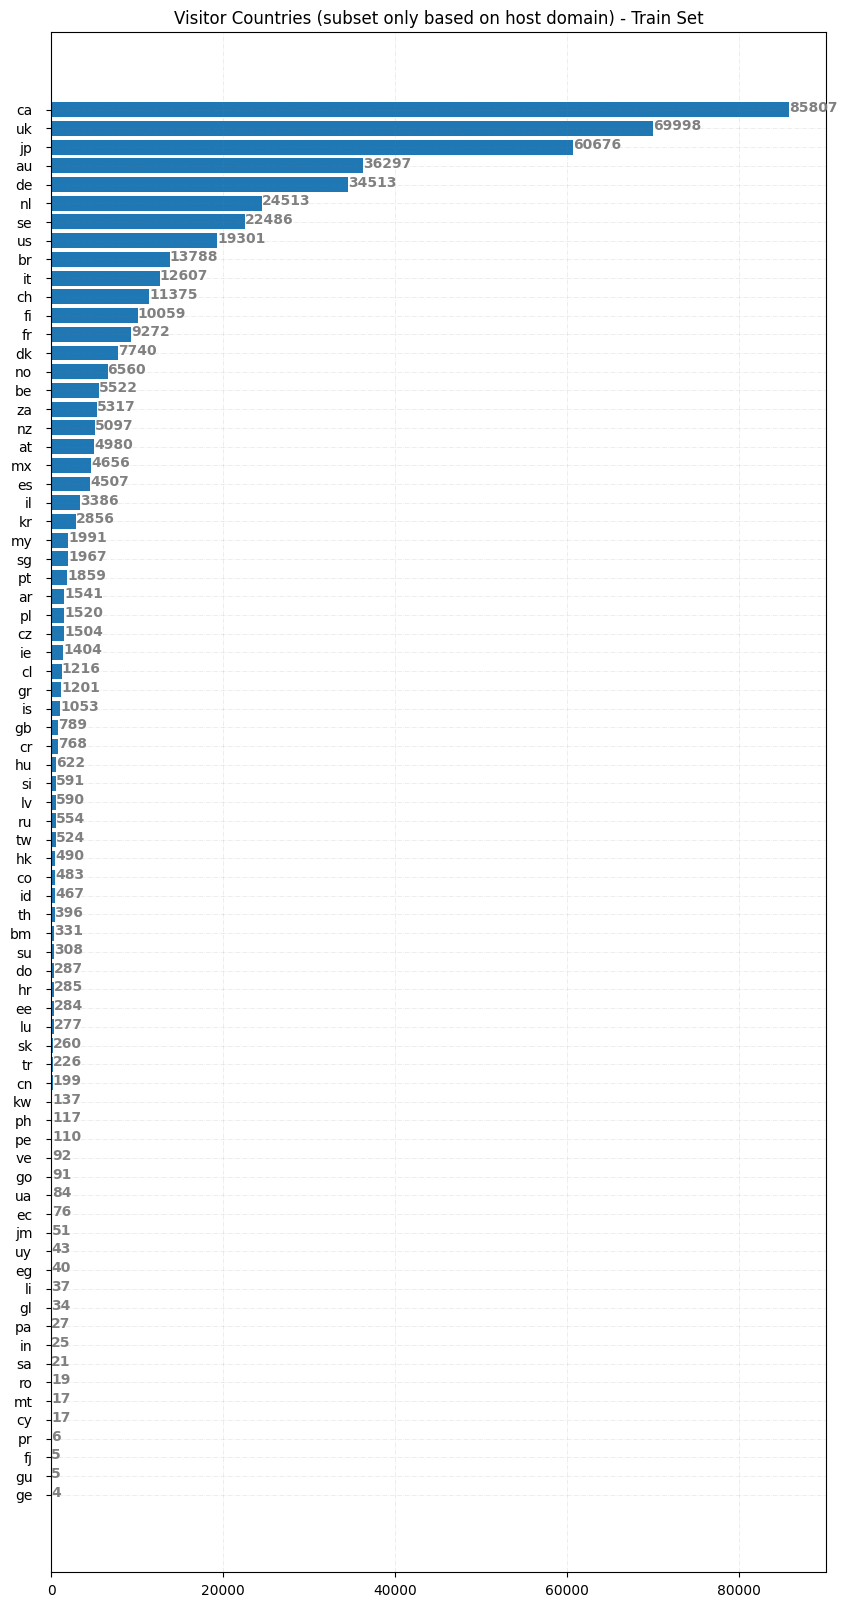

,domain,count
0,ca,85807
1,uk,69998
2,jp,60676
3,au,36297
4,de,34513
...,...,...
70,cy,17
71,pr,6
72,fj,5
73,gu,5


In [31]:
check_country(df_train_visitors, "Train")

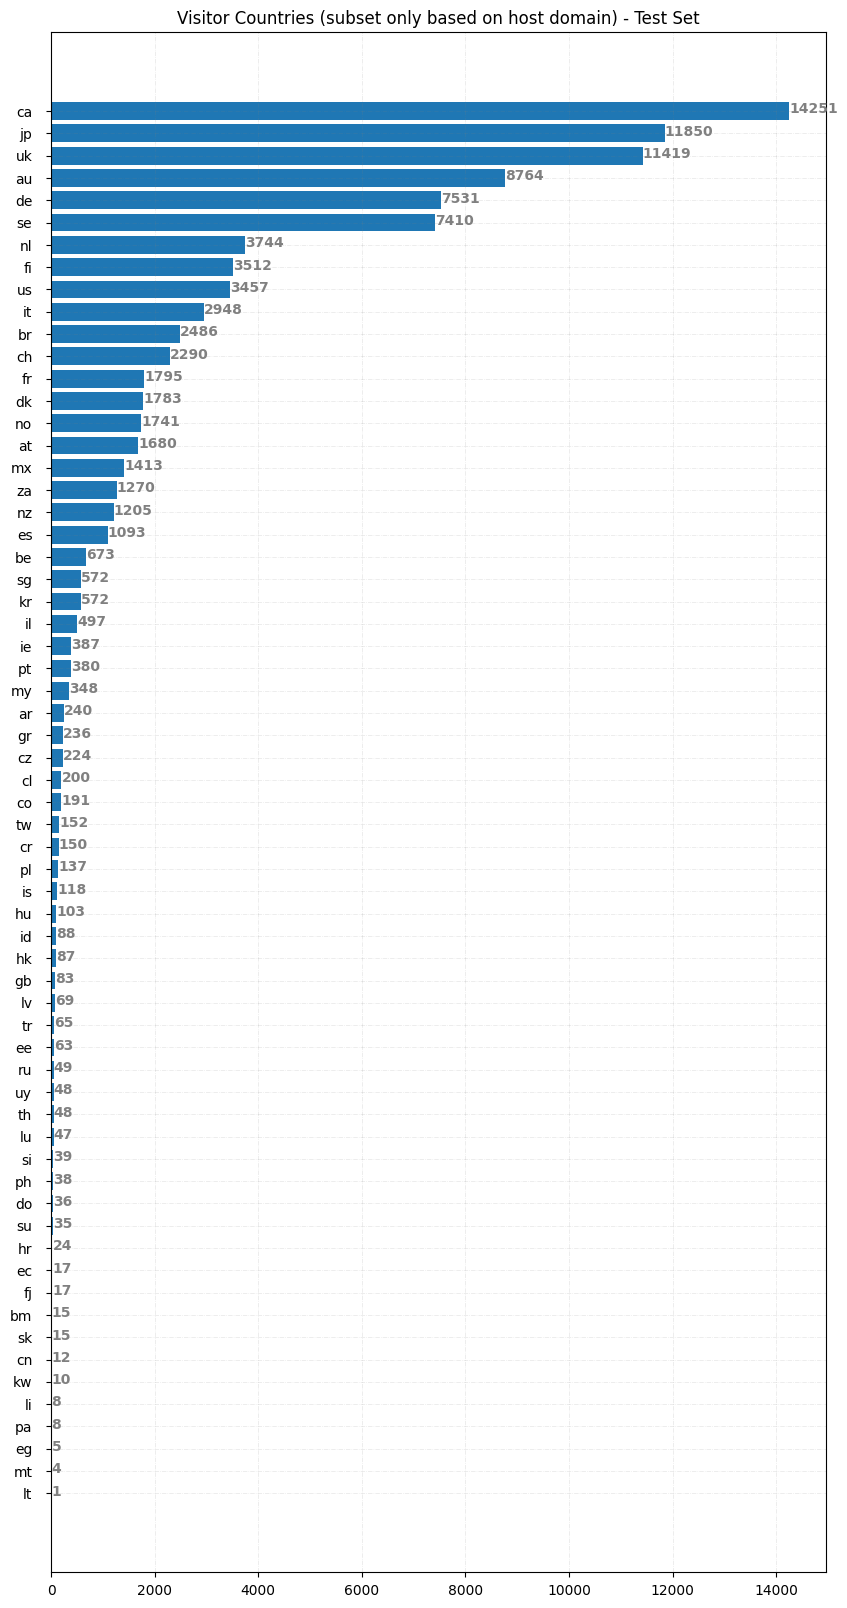

,domain,count
0,ca,14251
1,jp,11850
2,uk,11419
3,au,8764
4,de,7531
...,...,...
58,li,8
59,pa,8
60,eg,5
61,mt,4


In [34]:
check_country(df_test_visitors, "Test")

In [51]:
df_train_visitors

,index,host,domain,category
0,0,199.72.81.55,None,unknown
1,1,unicomp6.unicomp.net,net,network
2,2,199.120.110.21,None,unknown
3,3,burger.letters.com,com,commercial
4,4,199.120.110.21,None,unknown
...,...,...,...,...
2934925,2934925,sfsp129.slip.net,net,network
2934926,2934926,sfsp129.slip.net,net,network
2934927,2934927,sfsp129.slip.net,net,network
2934928,2934928,sfsp129.slip.net,net,network


In [52]:
df = df_train_visitors.copy()
df

,index,host,domain,category
0,0,199.72.81.55,None,unknown
1,1,unicomp6.unicomp.net,net,network
2,2,199.120.110.21,None,unknown
3,3,burger.letters.com,com,commercial
4,4,199.120.110.21,None,unknown
...,...,...,...,...
2934925,2934925,sfsp129.slip.net,net,network
2934926,2934926,sfsp129.slip.net,net,network
2934927,2934927,sfsp129.slip.net,net,network
2934928,2934928,sfsp129.slip.net,net,network


In [58]:


MAIN_TYPES = {
    'commercial',
    'country',
    'education',
    'government',
    'network',
    'unknown'
}

df['visitor_type'] = df['category'].apply(
    lambda x: x if x in MAIN_TYPES else 'other'
)


In [59]:
df['is_commercial'] = (df['visitor_type'] == 'commercial').astype(int)
df['is_unknown'] = (df['visitor_type'] == 'unknown').astype(int)

In [60]:
type_freq = df['visitor_type'].value_counts(normalize=True)
df['visitor_type_freq'] = df['visitor_type'].map(type_freq)


In [61]:
df['visitor_country'] = df.apply(
    lambda row: row['domain'] if row['category'] == 'country' else 'non_country',
    axis=1
)

In [62]:
TOP_N = 15

top_countries = (
    df[df['visitor_country'] != 'non_country']['visitor_country']
    .value_counts()
    .head(TOP_N)
    .index
)

df['visitor_country'] = df['visitor_country'].apply(
    lambda x: x if x in top_countries else 'other_country'
)


In [63]:
country_freq = df['visitor_country'].value_counts(normalize=True)
df['country_freq'] = df['visitor_country'].map(country_freq)

df['is_top_country'] = df['visitor_country'].isin(top_countries).astype(int)


In [65]:
FEATURE_COLS = [
    'index',
    'visitor_type',
    'is_commercial',
    'is_unknown',
    'visitor_type_freq',
    'visitor_country',
    'country_freq',
    'is_top_country'
]

df_train_visitors = df[FEATURE_COLS]

In [66]:
df_train_visitors

,index,visitor_type,is_commercial,is_unknown,visitor_type_freq,visitor_country,country_freq,is_top_country
0,0,unknown,0,1,0.253658,other_country,0.855195,0
1,1,network,0,0,0.086453,other_country,0.855195,0
2,2,unknown,0,1,0.253658,other_country,0.855195,0
3,3,commercial,1,0,0.299574,other_country,0.855195,0
4,4,unknown,0,1,0.253658,other_country,0.855195,0
...,...,...,...,...,...,...,...,...
2934925,2934925,network,0,0,0.086453,other_country,0.855195,0
2934926,2934926,network,0,0,0.086453,other_country,0.855195,0
2934927,2934927,network,0,0,0.086453,other_country,0.855195,0
2934928,2934928,network,0,0,0.086453,other_country,0.855195,0


In [ ]:
df_train.to_parquet(
    "../features/03_host.parquet",
    engine="fastparquet",
    index=False
)